In [1]:
import numpy as np
import matplotlib.pyplot as plt

function\
<font size="5"> $f(x) = x^3 - 7x^2 + 14x - 5 = 0$ \
<font size="5"> $f'(x) = 3x^2 - 14x + 14 = 0$

In [76]:
# function
def func1(x):
    y = x**3 - 7*x**2 + 14*x - 5
    return y

def func_der(x):
    y = 3*x**2 - 14*x + 14
    return y

x1 = np.arange(-1, 4, 0.1)
y1 = func1(x1)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

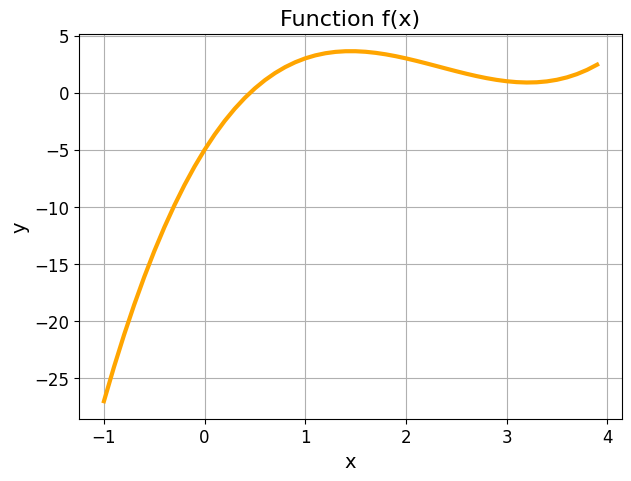

In [77]:
# plot the function, checking
plt.figure(figsize=(7, 5))
plt.plot(x1, y1, label='function 1', color='orange', lw=3)
#plt.xlim(-1, 5)   # Set x-axis from 2 to 8
#plt.ylim(-50, 50) # Set y-axis from -0.5 to 0.5
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Function f(x)', size=16)
plt.grid(True)
plt.tight_layout

In [60]:
# Bisection method
# Initial guess
xL = 0
xU = 1
err_tol = 1e-8
#err_B = 0.5 * (xL + xU) # arbitrary choice

def bisection(func1, xL, xU, err_tol):
    err_B = float('inf')   # start with large error
    #err_B = 0.5 * (xL + xU)
    xr_old_B = 0
    iter_B = 0

    while err_B > err_tol:
        iter_B += 1
        
        xr_B = 0.5 * (xL + xU)
        
        fL = func1(xL)
        fr = func1(xr_B)
        
        if fL * fr < 0:
            xU = xr_B
        else:
            xL = xr_B
        
        err_B = abs(xr_B - xr_old_B)
        xr_old_B = xr_B

        #print("error", err_B)

    return xr_B, iter_B

root_B, iterations_B = bisection(func1, xL, xU, err_tol)

print("Root:", root_B)
print("Iterations:", iterations_B)


Root: 0.4531817212700844
Iterations: 27


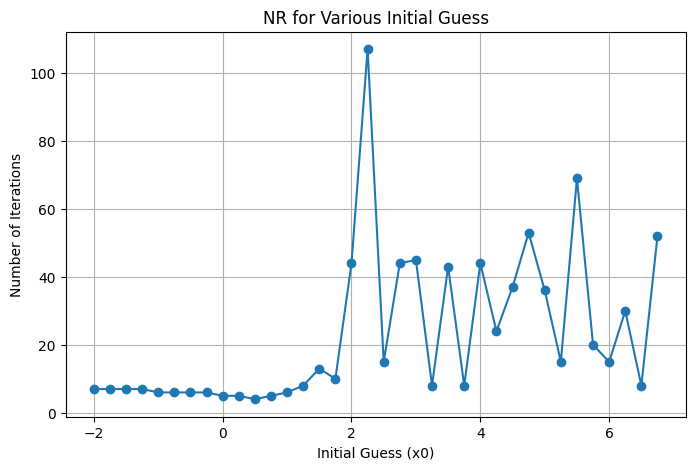

In [92]:
# Newton-Raphson method
# Initial guess

#x0 = -1
#x0_list = np.array([-2, -1, 0, 1, 2]) #various guess
x0_list = np.arange(-2,7,0.25) #various guess

err_tol = 1e-8

def nr(func1, func_der, x0, err_tol): 
    
    iter_NR = 0
    err_NR = float('inf') 

    while err_NR > err_tol:
        iter_NR += 1

        
        f = func1(x0)
        df = func_der(x0) 

        # Avoid division by zero
        if df == 0:
            print("Derivative is zero. Stopping iteration.")
            return None, iter_NR
        
        # Newton-Raphson update
        x1 = x0 - f / df
        
        err_NR = abs(x1 - x0)
        
        x0 = x1
        
        #print("error =", err_NR)
    return x0, iter_NR

root_NR, iterations_NR = nr(func1, func_der, x0, err_tol)

#print("Root:", root_NR)
#print("Iterations:", iterations_NR)

iterations_list = []

for x0 in x0_list:
    root, iterations = nr(func1, func_der, x0, err_tol)
    #print(f"x0: {x0}, Root: {root}, Iterations: {iterations}")
    iterations_list.append(iterations)


plt.figure(figsize=(8,5))
plt.plot(x0_list, iterations_list, marker='o', linestyle='-')
#plt.plot(x1, y1, label='function 1', color='orange', lw=3)
plt.xlabel("Initial Guess (x0)")
plt.ylabel("Number of Iterations")
plt.title("NR for Various Initial Guess")
plt.grid(True)
plt.show()

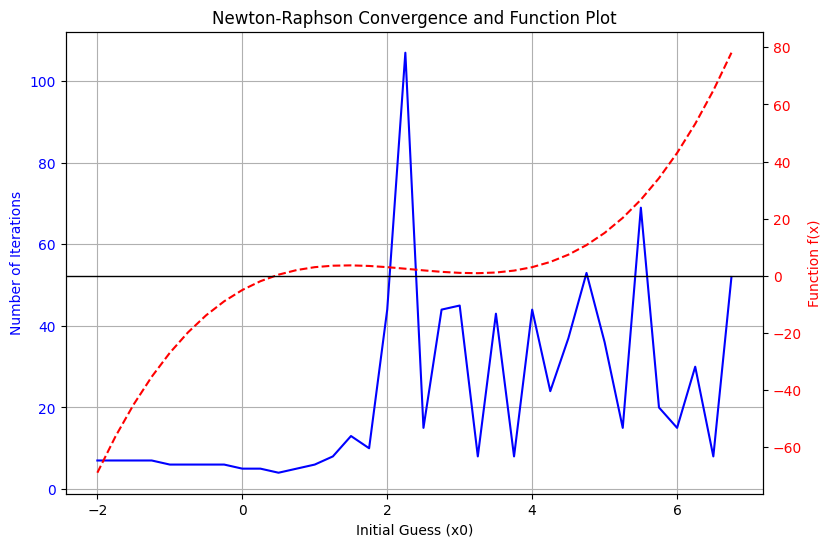

In [90]:
fig, ax1 = plt.subplots(figsize=(9,6))

# Left axis → iterations
ax1.plot(x0_list, iterations_list, color='blue', label='Iterations')
ax1.set_xlabel("Initial Guess (x0)")
ax1.set_ylabel("Number of Iterations", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Right axis → function
ax2 = ax1.twinx()
ax2.plot(x0_list, func1(x0_list), color='red', linestyle='--', label='f(x)')
ax2.set_ylabel("Function f(x)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(0, color='black', linewidth=1)

plt.title("Newton-Raphson Convergence and Function Plot")
plt.show()